## Aggregation of token training using Scibert

In [32]:
import os, json

file_path = "../output/scibert/"

os.listdir(file_path)

['token_scibert_scopes_16_3e-05_0.03',
 'token_scibert_scopes_4_7e-05_0.04',
 '_full_sentence_majo_scopes_2_5e-05_0.1',
 'token_scibert_scopes_32_0.0001_0.2',
 '_full_sentence_majo_total_2_5e-05_0.1',
 'token_scibert_scopes_32_1e-05_0.1',
 '_full_token_scibert_scopes_2_6e-05_0.06',
 'token_scibert_scopes_5_5e-05_0.15',
 'token_scibert_scopes_2_1e-05_0.1',
 'token_scibert_scopes_1_7e-05_0.07',
 'token_scibert_scopes_16_0.0001_0.15',
 '_full_token_scibert_total_2_5e-05_0.0',
 'token_scibert_scopes_2_5e-05_0.0',
 'token_scibert_scopes_2_6e-05_0.04',
 'token_scibert_scopes_16_6e-05_0.05',
 'token_scibert_scopes_2_3e-05_0.03',
 'token_scibert_scopes_2_5e-05_0.05',
 'token_scibert_scopes_16_0.0001_0.0',
 '_full_sentence_majo_total_2_5e-05_0.0',
 'token_scibert_scopes_5_5e-05_0.05',
 'token_scibert_scopes_2_0.0001_0.1',
 'token_scibert_scopes_32_1e-05_0.05',
 'token_scibert_scopes_1_4e-05_0.07',
 'token_scibert_scopes_4_3e-05_0.03',
 'token_scibert_scopes_8_0.0001_0.1',
 '_full_token_scibert_

In [33]:
import pandas as pd
json_data=[]
for fp in os.listdir(file_path):
    if fp.split('_')[0:3]==["token",'scibert','scopes']:
        print()
        print(fp)
        fp_path=os.path.join(file_path,fp)
        #print(fp_path)
        json_list=os.listdir(fp_path)
        json_list=sorted(json_list)
        arr=[[] for _ in range(2)]
        for i in range(len(json_list)):
            js=json_list[i]
            if js.split('.')[0]=='model_setup':
                arr[0].append(js)
            elif js.split('_')[0]=='eval':
                arr[1].append(js)
        print(arr)# split json files 3types
        tmp_dict={}
        for i in range(len(json_list)):
            js=json_list[i]
            #print(os.path.join(fp_path,js))
            json_path=os.path.join(fp_path,js)
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                if js==arr[0][0]:#Metadata of model
                    tmp_dict.update(data)
                    print(data)
                if js==arr[1][-3]:#eval_metrics
                    tmp_dict.update(data)
                    print(data)
        print(tmp_dict)
        json_data.append(tmp_dict)

print()
print("result")
print(json_data)


token_scibert_scopes_16_3e-05_0.03
[['model_setup.json'], ['eval_metrics1.json', 'eval_metrics10.json', 'eval_metrics11.json', 'eval_metrics12.json', 'eval_metrics13.json', 'eval_metrics14.json', 'eval_metrics15.json', 'eval_metrics16.json', 'eval_metrics17.json', 'eval_metrics2.json', 'eval_metrics3.json', 'eval_metrics4.json', 'eval_metrics5.json', 'eval_metrics6.json', 'eval_metrics7.json', 'eval_metrics8.json', 'eval_metrics9.json']]
{'loss': 0.9921875, 'acc': 0.6018325090408325, 'macro_f1': 0.5228587985038757, 'total_f1': 0.7538167834281921, 'inf_f1': 0.6116734743118286, 'perc_f1': 0.3507411777973175, 'backg_f1': 0.36959603428840637}
{'full_training': False, 'segment': 'token_scibert', 'mode': 'scopes', 'model_name': 'scibert', 'batch_size': 16, 'max_epoch': 20, 'learning_rate': 3e-05, 'dropout': 0.03}
{'loss': 0.9921875, 'acc': 0.6018325090408325, 'macro_f1': 0.5228587985038757, 'total_f1': 0.7538167834281921, 'inf_f1': 0.6116734743118286, 'perc_f1': 0.3507411777973175, 'backg_f

In [34]:
import numpy as np
df_json=pd.DataFrame(json_data).replace("None", np.nan)

In [35]:
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,0.992188,0.601833,0.522859,0.753817,0.611673,0.350741,0.369596,False,token_scibert,scopes,scibert,16,20,0.00003,0.03
1,1.085938,0.678367,0.597680,0.763800,0.677817,0.473478,0.426390,False,token_scibert,scopes,scibert,4,20,0.00007,0.04
2,1.164062,0.558849,0.529608,0.710282,0.667226,0.395075,0.376597,False,token_scibert,scopes,scibert,32,20,0.00010,0.20
3,1.429688,0.266051,0.238209,0.556882,0.174702,0.191318,0.223254,False,token_scibert,scopes,scibert,32,20,0.00001,0.10
4,1.195312,0.698174,0.591210,0.767453,0.666667,0.479145,0.381365,False,token_scibert,scopes,scibert,5,20,0.00005,0.15
5,1.335938,0.385367,0.323831,0.592897,0.279668,0.248419,0.230268,False,token_scibert,scopes,scibert,2,20,0.00001,0.10
6,1.156250,0.692448,0.608776,0.762468,0.681258,0.491402,0.439356,False,token_scibert,scopes,scibert,1,20,0.00007,0.07
7,1.515625,0.701475,0.597179,0.740955,0.696104,0.464256,0.398634,False,token_scibert,scopes,scibert,16,20,0.00010,0.15
8,1.328125,0.705922,0.604510,0.768647,0.673842,0.468939,0.434884,False,token_scibert,scopes,scibert,2,20,0.00005,0.00
9,1.125000,0.687193,0.609792,0.769761,0.674074,0.499622,0.446230,False,token_scibert,scopes,scibert,2,20,0.00006,0.04


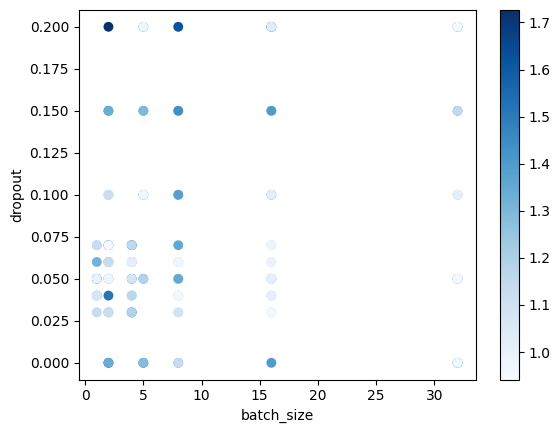

In [36]:
import matplotlib.pyplot as plt

plt.scatter(data = df_json, x = 'batch_size', y = 'dropout', c = 'loss', cmap = 'Blues')
plt.xlabel('batch_size')
plt.ylabel('dropout')
plt.colorbar()

### Results of token training using Scibert

In [37]:
df_json=df_json.sort_values(['macro_f1','total_f1','acc'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.507812,0.703901,0.620697,0.759353,0.704566,0.528503,0.423039,False,token_scibert,scopes,scibert,2,20,0.00006,0.06
1,1.468750,0.715085,0.614476,0.758019,0.727015,0.476543,0.414328,False,token_scibert,scopes,scibert,4,20,0.00007,0.06
2,1.125000,0.687193,0.609792,0.769761,0.674074,0.499622,0.446230,False,token_scibert,scopes,scibert,2,20,0.00006,0.04
3,1.117188,0.699117,0.609192,0.770533,0.680826,0.459984,0.466065,False,token_scibert,scopes,scibert,2,20,0.00005,0.05
4,1.210938,0.683891,0.609166,0.764451,0.685095,0.511449,0.427819,False,token_scibert,scopes,scibert,2,20,0.00006,0.07
5,1.156250,0.692448,0.608776,0.762468,0.681258,0.491402,0.439356,False,token_scibert,scopes,scibert,1,20,0.00007,0.07
6,1.460938,0.692448,0.608606,0.759121,0.697086,0.465003,0.452211,False,token_scibert,scopes,scibert,2,20,0.00005,0.15
7,1.132812,0.696962,0.606134,0.774851,0.669962,0.473124,0.451092,False,token_scibert,scopes,scibert,8,20,0.00005,0.05
8,0.945312,0.687799,0.605149,0.775386,0.700028,0.475444,0.422481,False,token_scibert,scopes,scibert,2,20,0.00004,0.07
9,1.328125,0.705922,0.604510,0.768647,0.673842,0.468939,0.434884,False,token_scibert,scopes,scibert,2,20,0.00005,0.00


In [38]:
print("Best batch_size and max_epochs")
df_json.iloc[0]

Best batch_size and max_epochs


loss                  1.507812
acc                   0.703901
macro_f1              0.620697
total_f1              0.759353
inf_f1                0.704566
perc_f1               0.528503
backg_f1              0.423039
full_training            False
segment          token_scibert
mode                    scopes
model_name             scibert
batch_size                   2
max_epoch                   20
learning_rate          0.00006
dropout                   0.06
Name: 0, dtype: object

In [39]:
df_json=df_json.sort_values(['total_f1','macro_f1','acc'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.046875,0.697366,0.596405,0.777371,0.653661,0.457599,0.437813,False,token_scibert,scopes,scibert,2,20,0.00003,0.05
1,0.988281,0.691370,0.590850,0.776326,0.639680,0.448874,0.442217,False,token_scibert,scopes,scibert,8,20,0.00004,0.04
2,1.015625,0.674459,0.580404,0.775677,0.639579,0.435040,0.427149,False,token_scibert,scopes,scibert,4,20,0.00003,0.07
3,0.945312,0.687799,0.605149,0.775386,0.700028,0.475444,0.422481,False,token_scibert,scopes,scibert,2,20,0.00004,0.07
4,1.132812,0.696962,0.606134,0.774851,0.669962,0.473124,0.451092,False,token_scibert,scopes,scibert,8,20,0.00005,0.05
5,1.015625,0.678704,0.579706,0.774059,0.645311,0.436167,0.411863,False,token_scibert,scopes,scibert,4,20,0.00003,0.04
6,0.976562,0.677424,0.589934,0.773513,0.657658,0.437276,0.445750,False,token_scibert,scopes,scibert,5,20,0.00010,0.20
7,0.980469,0.689685,0.584265,0.772745,0.660382,0.463687,0.378714,False,token_scibert,scopes,scibert,4,20,0.00003,0.03
8,0.992188,0.680388,0.583880,0.772369,0.631135,0.453277,0.427050,False,token_scibert,scopes,scibert,8,20,0.00004,0.05
9,1.078125,0.685576,0.591368,0.772178,0.646775,0.481905,0.408020,False,token_scibert,scopes,scibert,4,20,0.00006,0.05


## Aggregation of full training using Scibert

In [40]:
json_data=[]
for fp in os.listdir(file_path):
    if fp.split('_')[1:2]==['full']:
        print()
        print(fp)
        fp_path=os.path.join(file_path,fp)
        #print(fp_path)
        json_list=os.listdir(fp_path)
        json_list=sorted(json_list)
        arr=[[] for _ in range(2)]
        for i in range(len(json_list)):
            js=json_list[i]
            if js.split('.')[0]=='model_setup':
                arr[0].append(js)
            elif js.split('_')[0]=='eval':
                arr[1].append(js)
        print(arr)# split json files 3types
        tmp_dict={}
        for i in range(len(json_list)):
            js=json_list[i]
            #print(os.path.join(fp_path,js))
            json_path=os.path.join(fp_path,js)
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                if js==arr[0][0]:#Metadata of model
                    tmp_dict.update(data)
                    print(data)
                if js==arr[1][-3]:#eval_metrics
                    tmp_dict.update(data)
                    print(data)
        print(tmp_dict)
        json_data.append(tmp_dict)

print()
print("result")
print(json_data)


_full_sentence_majo_scopes_2_5e-05_0.1
[['model_setup.json'], ['eval_metrics1.json', 'eval_metrics10.json', 'eval_metrics2.json', 'eval_metrics3.json', 'eval_metrics4.json', 'eval_metrics5.json', 'eval_metrics6.json', 'eval_metrics7.json', 'eval_metrics8.json', 'eval_metrics9.json']]
{'loss': 1.28125, 'acc': 0.623869776725769, 'macro_f1': 0.5419695973396301, 'total_f1': 0.721941351890564, 'inf_f1': 0.5959596037864685, 'perc_f1': 0.45194804668426514, 'backg_f1': 0.3448275923728943}
{'full_training': True, 'segment': 'sentence_majo', 'mode': 'scopes', 'model_name': 'scibert', 'batch_size': 2, 'max_epoch': 20, 'learning_rate': 5e-05, 'dropout': 0.1}
{'loss': 1.28125, 'acc': 0.623869776725769, 'macro_f1': 0.5419695973396301, 'total_f1': 0.721941351890564, 'inf_f1': 0.5959596037864685, 'perc_f1': 0.45194804668426514, 'backg_f1': 0.3448275923728943, 'full_training': True, 'segment': 'sentence_majo', 'mode': 'scopes', 'model_name': 'scibert', 'batch_size': 2, 'max_epoch': 20, 'learning_rate'

In [41]:
df_json=pd.DataFrame(json_data).replace("None", np.nan)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.281250,0.623870,0.541970,0.721941,0.595960,0.451948,0.344828,True,sentence_majo,scopes,scibert,2,20,0.00005,0.10
1,0.597656,0.792043,NaN,0.746137,NaN,NaN,NaN,True,sentence_majo,total,scibert,2,20,0.00005,0.10
2,0.984375,0.688616,0.577609,0.750979,0.644957,0.451970,0.380896,True,token_scibert,scopes,scibert,2,20,0.00006,0.06
3,0.466797,0.773804,NaN,0.739964,NaN,NaN,NaN,True,token_scibert,total,scibert,2,10,5e-05,0.00
4,0.656250,0.786618,NaN,0.738359,NaN,NaN,NaN,True,sentence_majo,total,scibert,2,10,5e-05,0.00
5,0.984375,0.687707,0.583618,0.747405,0.663562,0.458015,0.382476,True,token_scibert,scopes,scibert,2,20,0.00005,0.10
6,1.351562,0.380152,0.308754,0.593829,0.242820,0.248561,0.196059,True,token_scibert,scopes,scibert,2,10,0.00001,0.00
7,0.878906,0.690778,0.550621,0.707497,0.894855,0.219355,0.307246,True,sentence_prio,scopes,scibert,2,10,5e-05,0.00
8,1.070312,0.641953,0.543660,0.733333,0.573913,0.455331,0.349869,True,sentence_majo,scopes,scibert,2,10,5e-05,0.00
9,1.218750,0.691017,0.600832,0.754505,0.720941,0.456361,0.398352,True,token_scibert,scopes,scibert,2,10,5e-05,0.00


### Results of full training using Scibert

In [42]:
df_json=df_json.sort_values(['macro_f1','total_f1','acc'],ignore_index=True, ascending=False)
df_json.head(10)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,1.218750,0.691017,0.600832,0.754505,0.720941,0.456361,0.398352,True,token_scibert,scopes,scibert,2,10,5e-05,0.00
1,0.984375,0.687707,0.583618,0.747405,0.663562,0.458015,0.382476,True,token_scibert,scopes,scibert,2,20,0.00005,0.10
2,0.976562,0.686409,0.580850,0.757708,0.655304,0.452849,0.383985,True,token_scibert,scopes,scibert,2,20,0.00005,0.05
3,0.984375,0.688616,0.577609,0.750979,0.644957,0.451970,0.380896,True,token_scibert,scopes,scibert,2,20,0.00006,0.06
4,0.910156,0.712477,0.562350,0.723077,0.883408,0.259887,0.299652,True,sentence_prio,scopes,scibert,2,20,0.00005,0.10
5,0.878906,0.690778,0.550621,0.707497,0.894855,0.219355,0.307246,True,sentence_prio,scopes,scibert,2,10,5e-05,0.00
6,1.070312,0.641953,0.543660,0.733333,0.573913,0.455331,0.349869,True,sentence_majo,scopes,scibert,2,10,5e-05,0.00
7,1.281250,0.623870,0.541970,0.721941,0.595960,0.451948,0.344828,True,sentence_majo,scopes,scibert,2,20,0.00005,0.10
8,1.351562,0.380152,0.308754,0.593829,0.242820,0.248561,0.196059,True,token_scibert,scopes,scibert,2,10,0.00001,0.00
9,0.464844,0.779516,NaN,0.750880,NaN,NaN,NaN,True,token_scibert,total,scibert,2,20,0.00005,0.10


In [43]:
df_json=df_json.sort_values(['total_f1','acc'],ignore_index=True, ascending=False)
df_json.head(15)

,loss,acc,macro_f1,total_f1,inf_f1,perc_f1,backg_f1,full_training,segment,mode,model_name,batch_size,max_epoch,learning_rate,dropout
0,0.976562,0.686409,0.580850,0.757708,0.655304,0.452849,0.383985,True,token_scibert,scopes,scibert,2,20,0.00005,0.05
1,1.218750,0.691017,0.600832,0.754505,0.720941,0.456361,0.398352,True,token_scibert,scopes,scibert,2,10,5e-05,0.00
2,0.984375,0.688616,0.577609,0.750979,0.644957,0.451970,0.380896,True,token_scibert,scopes,scibert,2,20,0.00006,0.06
3,0.464844,0.779516,NaN,0.750880,NaN,NaN,NaN,True,token_scibert,total,scibert,2,20,0.00005,0.10
4,0.984375,0.687707,0.583618,0.747405,0.663562,0.458015,0.382476,True,token_scibert,scopes,scibert,2,20,0.00005,0.10
5,0.597656,0.792043,NaN,0.746137,NaN,NaN,NaN,True,sentence_majo,total,scibert,2,20,0.00005,0.10
6,0.466797,0.773804,NaN,0.739964,NaN,NaN,NaN,True,token_scibert,total,scibert,2,10,5e-05,0.00
7,0.656250,0.786618,NaN,0.738359,NaN,NaN,NaN,True,sentence_majo,total,scibert,2,10,5e-05,0.00
8,1.070312,0.641953,0.543660,0.733333,0.573913,0.455331,0.349869,True,sentence_majo,scopes,scibert,2,10,5e-05,0.00
9,0.617188,0.779385,NaN,0.729490,NaN,NaN,NaN,True,sentence_prio,total,scibert,2,10,5e-05,0.00


In [44]:
print("Best parameters for full training")
df_json.iloc[0]

Best parameters for full training


loss                  0.976562
acc                   0.686409
macro_f1               0.58085
total_f1              0.757708
inf_f1                0.655304
perc_f1               0.452849
backg_f1              0.383985
full_training             True
segment          token_scibert
mode                    scopes
model_name             scibert
batch_size                   2
max_epoch                   20
learning_rate          0.00005
dropout                   0.05
Name: 0, dtype: object